# 第8回 クラスタリングその1: 基本的事項

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます

編集を行なった後は、Windowsでは「Ctrl+s」、Macでは「Cmd+s」で保存することができます

まず、必要なパッケージを読み込みます

In [1]:
using Plots, CSV, Statistics

# 3つの正規分布データ

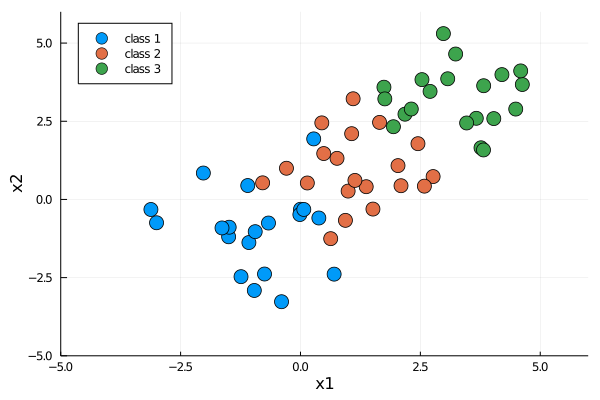

In [1]:
# 3つの正規分布から成るデータを作る
N = 60

x_class1 = randn(Float64, 20, 2) .- 1.0
x_class2 = randn(Float64, 20, 2) .+ 1.0
x_class3 = randn(Float64, 20, 2) .+ 3.0

x = [x_class1; x_class2; x_class3]

scatter(x[1:20, 1], x[1:20, 2], xlims=(-5,6), ylims=(-5,6), markersize=8, label="class 1")

scatter!(x[21:40, 1], x[21:40, 2], xlims=(-5,6), ylims=(-5,6), markersize=8, label="class 2")

scatter!(x[41:60, 1], x[41:60, 2], xlims=(-5,6), ylims=(-5,6), markersize=8, label="class 3", xlabel="x1", ylabel="x2", legend=:topleft)

## K-meansクラスタリング

In [1]:
function kmeans(x, K)
  N = size(x, 1)
  p = size(x, 2)
  # 初期化
  class = rand(1:K, N)
  centers = zeros(Float64, K, p)
  d_min = zeros(Float64, N)
  for k = 1:K
    centers[k:k, :] .= mean(x[class .== k, :], dims=1)
  end  
  # 収束するまでやるのが望ましいが、ここでは時間の節約のために1000回繰り返しにする
  for i = 1:1000
    d_min .= Inf
    # 分類の更新
    for k = 1:K
      d = sqrt.(sum((x .- centers[k:k, :]).^2, dims=2))
      idx = d .< d_min
			class[idx[:]] .= k
      d_min[idx[:]] .= d[idx]
    end
    # 重心の更新
    for k = 1:K
      centers[k:k, :] .= mean(x[class .== k, :], dims=1)
    end
  end
  score = sum(d_min.^2)
  return class, centers, score
end

kmeans

In [1]:
# K=3として、k-meansクラスタリングを行う
class, centers, score = kmeans(x, 3)

([1, 1, 1, 1, 3, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [-0.901021 -1.03792; 3.20408 3.29514; 1.28162 1.07094], 111.429)

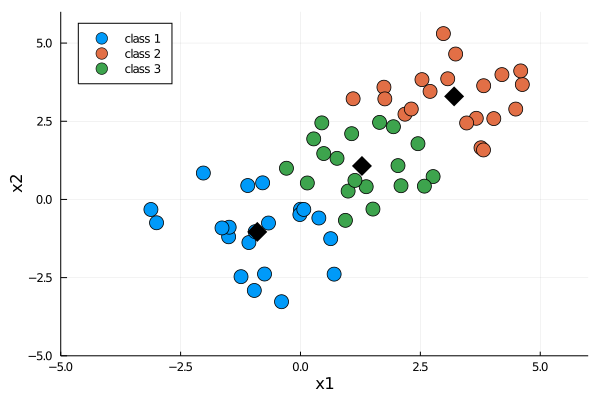

In [1]:
# クラスタの中心と合わせて分類結果をプロット
scatter(x[class .== 1, 1], x[class .== 1, 2], markersize=8, label="class 1")

scatter!(x[class .== 2, 1], x[class .== 2, 2], markersize=8, label="class 2")

scatter!(x[class .== 3, 1], x[class .== 3, 2], markersize=8, label="class 3", xlabel="x1", ylabel="x2", legend=:topleft)

scatter!(centers[:, 1], centers[:, 2], markershape=:diamond, markersize=10, color=:black, label=nothing, xlims=(-5,6), ylims=(-5,6), xlabel="x1", ylabel="x2", legend=:topleft)

## エルボー法

In [1]:
# K=1〜10でエルボー法計算を行います
score = zeros(10) #scoreは評価関数のこと
for k = 1:length(score)
  println("clustering with K=$(k)...")
  class_k, centers_k, score_k = kmeans(x, k)
  score[k] = score_k
end

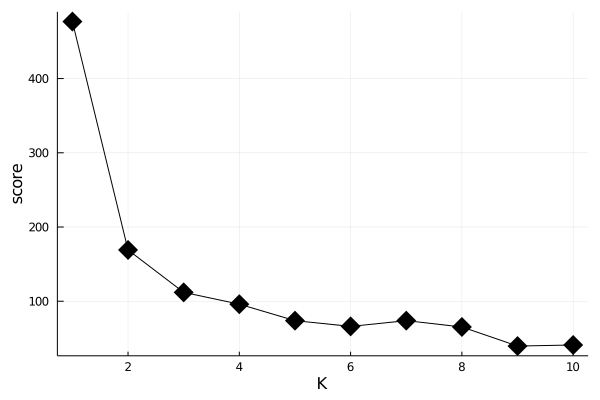

In [1]:
plot(1:10, score, markershape=:diamond, markersize=10, color=:black, label=nothing, xlabel="K", ylabel="score", legend=:topleft)

# 階層的なデータ

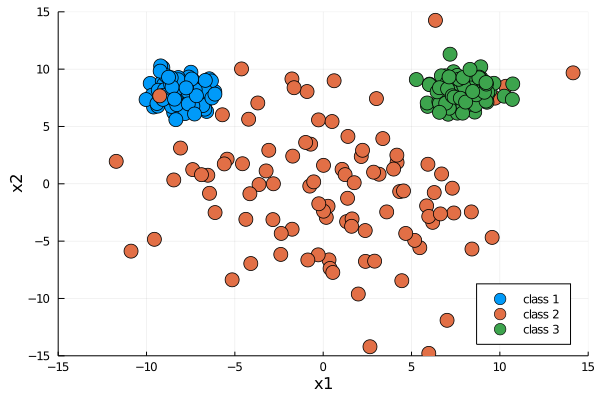

In [1]:
# 3つのサイズが異なる(正規分布の分散が異なる)データを作る
N = 300

x_class1 = randn(Float64, 100, 2)
x_class1[:, 1] .= x_class1[:, 1] .- 8.0
x_class1[:, 2] .= x_class1[:, 2] .+ 8.0

x_class2 = 5.0 .* randn(Float64, 100, 2)

x_class3 = randn(Float64, 100, 2)
x_class3[:, 1] .= x_class3[:, 1] .+ 8.0
x_class3[:, 2] .= x_class3[:, 2] .+ 8.0

x = [x_class1; x_class2; x_class3]

scatter(x[1:100, 1], x[1:100, 2], xlims=(-15,15), ylims=(-15,15), markersize=8, label="class 1")

scatter!(x[101:200, 1], x[101:200, 2], xlims=(-15,15), ylims=(-15,15), markersize=8, label="class 2")

scatter!(x[201:300, 1], x[201:300, 2], xlims=(-15,15), ylims=(-15,15), markersize=8, label="class 3", xlabel="x1", ylabel="x2", legend=:bottomright)

In [1]:
# K=3として、k-meansクラスタリングを行う
class, centers, score = kmeans(x, 3)

([2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1.43897 -2.73908; -7.59022 7.39509; 7.88973 7.91971], 3929.27)

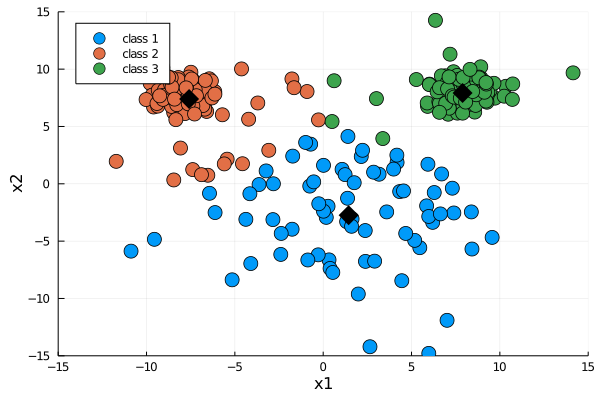

In [1]:
# クラスタの中心と合わせて分類結果をプロット
scatter(x[class .== 1, 1], x[class .== 1, 2], markersize=8, label="class 1")

scatter!(x[class .== 2, 1], x[class .== 2, 2], markersize=8, label="class 2")

scatter!(x[class .== 3, 1], x[class .== 3, 2], markersize=8, label="class 3", xlabel="x1", ylabel="x2", legend=:topleft)

scatter!(centers[:, 1], centers[:, 2], markershape=:diamond, markersize=10, color=:black, label=nothing, xlims=(-15,15), ylims=(-15,15), xlabel="x1", ylabel="x2", legend=:topleft)

# やってみよう: MNISTデータのK-meansクラスタリング

先週に引き続き、0〜9の手書き数字データであるMNISTデータにK-meansクラスタリングを適用してみましょう。

MNISTデータは機械学習の画像認識の分野で有名なデータです。0から9までの数字を手書きした画像データ 60,000枚に対してその答えである数字がラベルされています。

* 1列目 数字の答え (ラベル、目的変数)
* 2列目〜785列目 28×28ピクセルの白黒画像の濃淡 (説明変数)

データ容量の制限から、ここでは画像データ60,000枚を5,000枚に削減したものをこのnotebook内へ置いています。

[mnist_reduced.csv](https://nextjournal.com/data/QmUsVajJ792FPfc9AEqm3C2EdemFfCUTERQpEgModigvjW?content-type=text/csv&node-id=0f01b25d-e266-4fd1-bbac-0b3f27c1b8a0&filename=mnist_reduced.csv&node-kind=file)


In [1]:
# CSVデータの読み込み、labelは正解の数字を示す。その他のカラムは画像の各ピクセルの濃さ(白黒)に対応する
mnist = CSV.read("/.nextjournal/data-named/QmUsVajJ792FPfc9AEqm3C2EdemFfCUTERQpEgModigvjW/mnist_reduced.csv")

# データが1列目のラベル(数字)以外は画像なので、Array(Matrix)へ変換して扱うことにする
mnist = Float64.(convert(Matrix, mnist))

# ラベル(y)と入力(x)のベクトルを取り出す。5000枚でもまだ多いので、更に200枚へ削減する
y = Int.(mnist[1:200, 1])
X = mnist[1:200, 2:end]

200×784 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

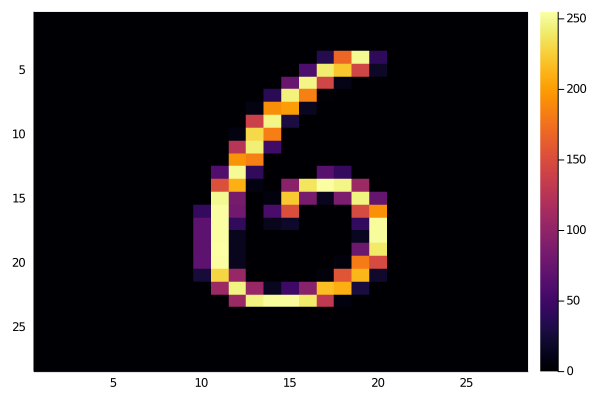

In [1]:
# 例えば19番目のエントリ(19行列目)のラベルyと画像xを表示させるには以下のようにします
id = 19
println("この画像の数字は$(y[id])です")
heatmap(reshape(X[id, :], 28, 28)', yflip=true)

In [1]:
# 0〜9の手書き数字なので、K=10としてk-meansを行う
class, centers, score = kmeans(X, 10)

([3, 9, 2, 10, 8, 5, 6, 3, 6, 4  …  5, 10, 9, 4, 2, 8, 2, 10, 6, 5], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 4.45905e8)

## 1. Centroidsのプロット

In [1]:
# クラスタのCentroidsをプロットする
plts = []

for k = 1:10
  push!(plts, heatmap(reshape(centers[k, :], 28, 28)', yflip=true))
end

# 下の...という記号はArrayの要素で展開する操作を意味する
plot(plts..., layout = (5, 2), size = [900, 1500])

## 2. エルボー法

In [1]:
# K=1〜15でエルボー法計算を行う

score = zeros(15) #scoreは評価関数のこと
for k = 1:15
  println("clustering with K=$(k)...")
  class_k, centers_k, score_k = kmeans(X, k)
  score[k] = score_k
end

In [1]:
# エルボー法の結果のプロット

plot(1:15, score, markershape=:diamond, markersize=10, color=:black, label=nothing, xlabel="K", ylabel="score", legend=:topleft)